# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [18]:
def apply_svd_custom(X_train, X_test, n_components):
    # Step 1: Center the data (subtract the mean)
    X_mean = np.mean(X_train, axis=0)
    X_train_centered = X_train - X_mean
    X_test_centered = X_test - X_mean

    # Covariance matrix
    covariance_matrix = np.dot(X_train_centered.T, X_train_centered) / X_train_centered.shape[0]

    # Eigenvalues and eigenvectors of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)  # eigh is used for symmetric matrices

    # Sort eigenvalues and eigenvectors in descending order of eigenvalues
    sorted_indices = np.argsort(eigenvalues)[::-1]  # Sort in descending order
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    # Select the top n_components eigenvectors
    principal_components = sorted_eigenvectors[:, :n_components]

    # Project the centered data onto the selected principal components
    X_train_reduced = np.dot(X_train_centered, principal_components)
    X_test_reduced = np.dot(X_test_centered, principal_components)

    return X_train_reduced, X_test_reduced, principal_components 


## Part 3: Train Logistic Regression and Measure Performance

In [8]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')
    
    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_timer
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [32]:
# Function for the displaying top 5 singular vectors
def visualize_top_singular_vectors(principal_components):
    plt.figure(figsize=(10, 2))
    for i in range(5):
        singular_vector = principal_components[:, i].reshape(28, 28)  # Reshape to 28x28
        plt.subplot(1, 5, i + 1)
        plt.imshow(singular_vector, cmap='gray')
        plt.title(f"Vector {i + 1}")
        plt.axis('off')

    plt.suptitle('Top 5 Singular Vectors')
    plt.show()


Training models with different levels of SVD preprocessing...
Applying custom SVD with 500 components...
Displaying top 5 singular vectors for 500 components...


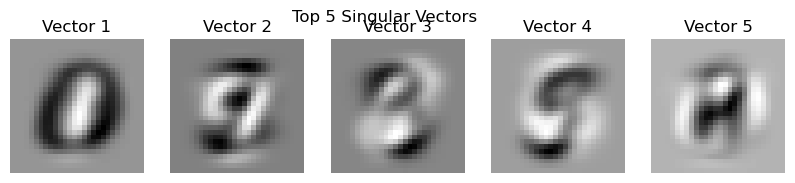

SVD components: 500, Accuracy: 0.9205, Training time: 182.6603 seconds
Applying custom SVD with 300 components...
Displaying top 5 singular vectors for 300 components...


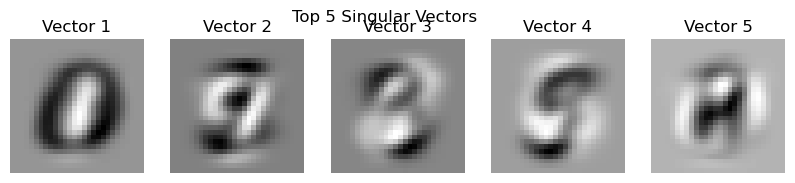

SVD components: 300, Accuracy: 0.9206, Training time: 83.5381 seconds
Applying custom SVD with 100 components...
Displaying top 5 singular vectors for 100 components...


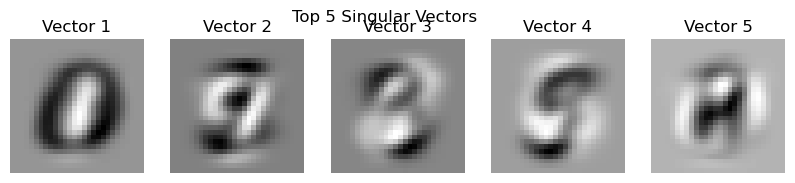

SVD components: 100, Accuracy: 0.9181, Training time: 20.5490 seconds
Applying custom SVD with 50 components...
Displaying top 5 singular vectors for 50 components...


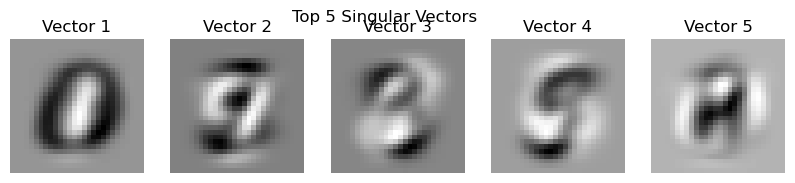

SVD components: 50, Accuracy: 0.9080, Training time: 5.6961 seconds
Applying custom SVD with 20 components...
Displaying top 5 singular vectors for 20 components...


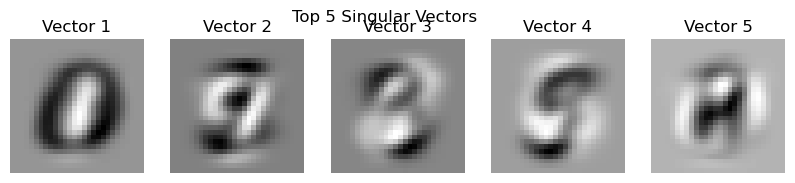

SVD components: 20, Accuracy: 0.8784, Training time: 1.0111 seconds
Applying custom SVD with 10 components...
Displaying top 5 singular vectors for 10 components...


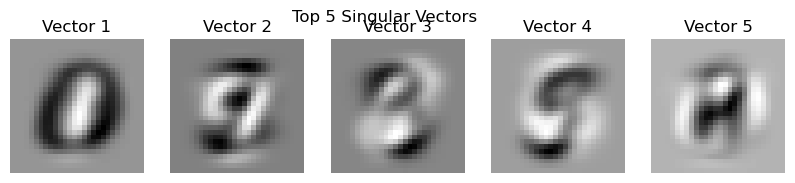

SVD components: 10, Accuracy: 0.8035, Training time: 0.3799 seconds


In [37]:
svd_components = [500, 300, 100, 50, 20, 10]  
results = []

print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")
    
    # Apply SVD to the training and test sets
    X_train_svd, X_test_svd, principal_components = apply_svd_custom(X_train, X_test, n_components)
    
    if n_components >= 5:
        print(f"Displaying top 5 singular vectors for {n_components} components...")
        visualize_top_singular_vectors(principal_components)
    
    # Train the logistic regression model and get accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)
    
    # Store the result (for plotting later)
    results.append((n_components, accuracy, training_time))
    
    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")



## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


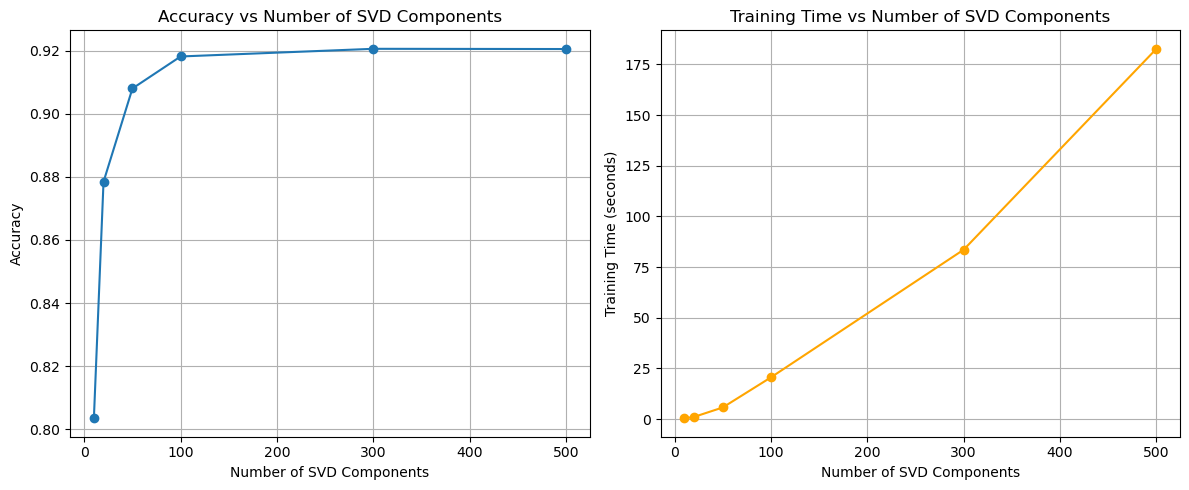

In [40]:
results_np = np.array(results)

components = results_np[:, 0]
accuracies = results_np[:, 1]
training_times = results_np[:, 2]

# Plot accuracy vs number of components
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(components, accuracies, marker='o')
plt.title('Accuracy vs Number of SVD Components')
plt.xlabel('Number of SVD Components')
plt.ylabel('Accuracy')
plt.grid(True)

# Plot training time vs number of components
plt.subplot(1, 2, 2)
plt.plot(components, training_times, marker='o', color='orange')
plt.title('Training Time vs Number of SVD Components')
plt.xlabel('Number of SVD Components')
plt.ylabel('Training Time (seconds)')
plt.grid(True)

plt.tight_layout()
plt.show()


**Top 5 singular vectors shown above, before the code^

## Part 6: Analyze / Conclusion 

YOUR ANSWER: 

In this assignment, Singular Value Decomposition (SVD) was used for dimensionality reduction on the MNIST dataset to evaluate its impact on logistic regression model performance and training time. I tested 6 different numbers of SVD components. As the number of SVD components decreased, training time significantly improved, but this came at the cost of reduced accuracy. For example, using 500 components resulted in 92.05% accuracy with a training time of 182.66 seconds, whereas reducing to 10 components cut the training time to 0.38 seconds but lowered accuracy to 80.35%. A key finding was that 300 components maintained high accuracy (92.06%) with significantly reduced training time (83.54 seconds), highlighting an optimal trade-off between model efficiency and performance. The visualization of the top 5 singular vectors further revealed the most important features in the dataset, demonstrating the effectiveness of SVD in capturing essential data patterns while reducing dimensionality.